# Feature Extraction Test Data

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
%matplotlib inline

In [5]:
os.getcwd()

'/Users/daksh_mac/Desktop/SmartCleanCityHackZurich19-master'

In [6]:
%cd data

/Users/daksh_mac/Desktop/SmartCleanCityHackZurich19-master/data


## Load the Files

In [7]:
pred_msr = pd.read_csv("./2019-09-27-basel-measures-prediction-cleaned.csv", sep=";") 

In [8]:
print(pred_msr.shape)
pred_msr.head()

(7292, 3)


,osm_id,cci_id,date
0,172611027,86_12812,2019-06-25 6:25:49
1,3828924874,260,2019-06-25 6:26:22
2,23913163,86_9255,2019-06-25 6:26:26
3,23913163,86_17476,2019-06-25 6:26:26
4,144481239,86_12223,2019-06-25 6:27:21


In [9]:
pred_msr_features = pred_msr.copy()

## Add features from datetime: hour, day, weekday, month and year

In [10]:
import datetime

def get_datefeat(date_str):
    a = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    weekday = a.weekday()
    month = a.month
    day = a.day
    hour = a.hour
    year = a.year
    
    return (hour, day, weekday, month, year)

datefeat = pd.DataFrame.from_records(pred_msr_features.date.apply(lambda x: get_datefeat(x)).tolist(), columns=['hour', 'day', 'weekday', 'month', 'year'])

pred_msr_features = pred_msr_features.join(datefeat)

pred_msr_features.head()

,osm_id,cci_id,date,hour,day,weekday,month,year
0,172611027,86_12812,2019-06-25 6:25:49,6,25,1,6,2019
1,3828924874,260,2019-06-25 6:26:22,6,25,1,6,2019
2,23913163,86_9255,2019-06-25 6:26:26,6,25,1,6,2019
3,23913163,86_17476,2019-06-25 6:26:26,6,25,1,6,2019
4,144481239,86_12223,2019-06-25 6:27:21,6,25,1,6,2019


### Plot hours when rubbish situation was recorded

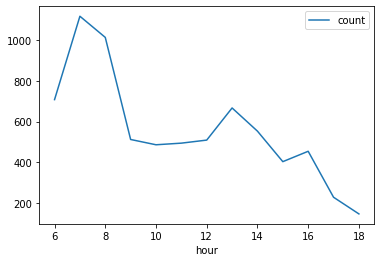

In [11]:
b = pd.DataFrame(pred_msr_features.hour.value_counts()).reset_index().sort_values(by='index')

b.columns = ['hour', 'count']

b.plot(x='hour', y='count')

## Possible feature for future websearches (currently not used: German names for months and weekdays)

In [12]:
english_months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
                10:'October', 11:'November', 12:'December'}

english_weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday',3:'Thursday',4:'Friday', 5:'Saturday', 6:'Sunday'}


pred_msr_features['month_english'] = pred_msr_features.month.apply(lambda x: english_months[x])
pred_msr_features['weekday_english'] = pred_msr_features.weekday.apply(lambda x: english_weekdays[x])



## Encode hours as daytimes: night, morning, afternoon, evening

In [13]:
def get_daytime(hour):
    if 0 <= hour < 6:
        return 'night'
    if 6 <= hour < 12:
        return 'morning'
    if 12 <= hour < 19:
        return 'afternoon'
    if 19 <= hour < 24:
        return 'evening'

pred_msr_features['daytime'] = pred_msr_features.hour.apply(lambda x: get_daytime(x))

## Save features to file

In [14]:
pred_msr_features.to_csv('2019-09-27-basel-measures-prediction-cleaned-FEAT.csv', index=None)